In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os

In [17]:
def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)

def Temp(temperature, magnetic_field):
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp(8 * J / (temperature)) + 
        (
            2 * 
            np.cosh(2 * magnetic_field / (temperature))
        )
    )    
    term1 = (np.log(Z))
    
    
    numerator = ((                
            ( (-1)*
                8 * J * 
                np.exp(8 * J / (temperature))
            ) + 
            ( (-1)*
                4 * magnetic_field * 
                np.sinh(2 * magnetic_field / (temperature))
            )
        )/temperature)
    
    denominator = Z
    term2 =  numerator / denominator
    calculated_temperature = term1 + term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature


def Entropia(hi, hf, INTERVAL, temperature_guess):
    
    B = np.linspace(hi, hf, INTERVAL)
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)

    


    for magnetic_field in B:
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            calculated_temperature = fsolve(lambda temperature: Temp(temperature, magnetic_field), temperature_guess)
            
            
            
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            #Update temperature guess with the result of previuos systems
            temperature_guess = calculated_temperature[0]
            
            T_values[magnetic_field] = calculated_temperature[0]
            
            S_values[magnetic_field] = Temp(J, calculated_temperature[0], magnetic_field)
            
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        
    #Plotando os gráficos
    plt.figure(figsize=(12, 5))

    # Gráfico B vs T
    plt.subplot(1, 2, 1)
    plt.plot(B_values, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('B vs T')
    plt.grid(True)

    # Gráfico B vs S
    plt.subplot(1, 2, 2)
    plt.plot(B_values, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('B vs S')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [18]:
J = 0.5
hi = 1
hf = 2
INTERVAL = 100
temperature_guess = 1

Entropia(hi,hf, INTERVAL, temperature_guess)

C:\Users\bolar\AppData\Local\Temp\ipykernel_21084\616295285.py:50: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(temperature, magnetic_field), temperature_guess)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parâmetro fixo
J = 0.7

def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)

def Temp(temperature, magnetic_field):
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    
    Z = 1 + np.exp(8 * J / temperature) + 2 * np.cosh(2 * magnetic_field / temperature)
    term1 = np.log(Z)
    
    numerator = (
        (-8 * J * np.exp(8 * J / temperature)) +
        (-4 * magnetic_field * np.sinh(2 * magnetic_field / temperature))
    ) / temperature
    
    denominator = Z
    term2 = numerator / denominator
    calculated_temperature = term1 + term2 - 1
    
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    
    return calculated_temperature

def Entropia(hi, hf, INTERVAL, temperature_guess):
    B = np.linspace(hi, hf, INTERVAL)
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    temperatures = []

    for idx, magnetic_field in enumerate(B):
        if log_detailed_calculation(magnetic_field):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        
        try:
            calculated_temperature = fsolve(lambda T: Temp(T, magnetic_field), temperature_guess)
            T_found = calculated_temperature[0]
                        
            temperature_guess = T_found  # Atualiza o palpite para o próximo passo
            
            T_values[idx] = T_found
            S_values[idx] = Temp(T_found, magnetic_field)
            temperatures.append(T_found)

        if log_detailed_calculation(magnetic_field):
            print(f"========== END FIELD = {magnetic_field} ==========")

    # Plotando os gráficos
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(B, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('B vs T')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(B, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('B vs S')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Exemplo de chamada
Entropia(hi=1.0, hf=2.0, INTERVAL=1000, temperature_guess=2.0)

SyntaxError: expected 'except' or 'finally' block (1060378171.py, line 52)

C:\Users\bolar\AppData\Local\Temp\ipykernel_21084\245351120.py:43: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda T: Temp(T, magnetic_field), [temperature_guess-2, temperature_guess+2])


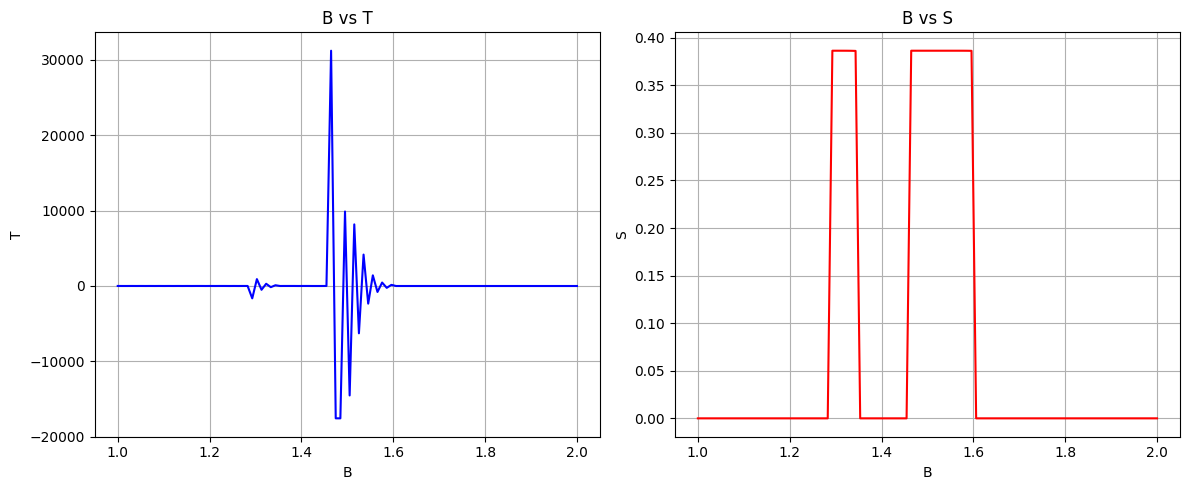

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve



def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)

def Temp(temperature, magnetic_field):
    if log_detailed_calculation(magnetic_field):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    
    Z = 1 + np.exp(8 * J / temperature) + 2 * np.cosh(2 * magnetic_field / temperature)
    term1 = np.log(Z)
    
    numerator = (
        (-8 * J * np.exp(8 * J / temperature)) +
        (-4 * magnetic_field * np.sinh(2 * magnetic_field / temperature))
    ) / temperature
    
    denominator = Z
    term2 = numerator / denominator
    calculated_temperature = term1 + term2 - 1  # <- aqui você está ajustando para S = 1
    
    if log_detailed_calculation(magnetic_field):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    
    return calculated_temperature

def Entropia(hi, hf, INTERVAL, temperature_guess):
    B = np.linspace(hi, hf, INTERVAL)
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    B_values = np.zeros_like(B)
    temperatures = []

    for idx, magnetic_field in enumerate(B):
        if log_detailed_calculation(magnetic_field):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        
        try:
            calculated_temperature = fsolve(lambda T: Temp(T, magnetic_field), [temperature_guess-2, temperature_guess+2])
            T_found = calculated_temperature[0]
            
            temperature_guess = T_found  # Atualiza o palpite para o próximo passo
            
            T_values[idx] = T_found
            S_values[idx] = Temp(T_found, magnetic_field)
            B_values[idx] = magnetic_field
            temperatures.append(T_found)
        except RuntimeWarning:
            T_values[idx] = np.nan
            S_values[idx] = np.nan
            temperatures.append(np.nan)
        
        if log_detailed_calculation(magnetic_field):
            print(f"========== END FIELD = {magnetic_field} ==========")

    # Plotando os gráficos
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(B_values, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('B vs T')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(B_values, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('B vs S')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Parâmetro fixo
J = 0
# Exemplo de chamada
Entropia(hi=1.0, hf=2.0, INTERVAL=100, temperature_guess=10.0)
